**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2023 &#x25aa; Uhan**

# Lesson 9. Outliers and Unusual Points

_Setup._ Tweak the width and height values below to adjust the size of your plots in this notebook.

In [1]:
options(repr.plot.width=8, repr.plot.height=8)

## Overview

- If one or two "unusual" observations are dominating the estimate of the line, we need to know

- This is part of assessing the model

## Example 1

The dataset `PalmBeach` contains data from the US presidential election in 2000.
The race was very close, and the votes from Florida ended up determining the outcome.
`PalmBeach` contains the number of votes for two candidates in Florida counties.

First, let's load the data.

In [2]:
library(Stat2Data)
data(PalmBeach)
head(PalmBeach)

,County,Buchanan,Bush
,<fct>,<int>,<int>
1,ALACHUA,262,34062
2,BAKER,73,5610
3,BAY,248,38637
4,BRADFORD,65,5413
5,BREVARD,570,115185
6,BROWARD,789,177279


(a) Plot the number of votes for candidate George W. Bush (x-axis) versus the number of votes for candidate Pat Buchanan (y-axis), and include a fitted simple linear regression line.

Add the following code to your plotting code.

```r
text(PalmBeach$Bush, PalmBeach$Buchanan, pos=1)  # pos = 1 means put labels to the right of each point
```

This code adds labels to the points in the scatterplot, so we can identify unusual points.

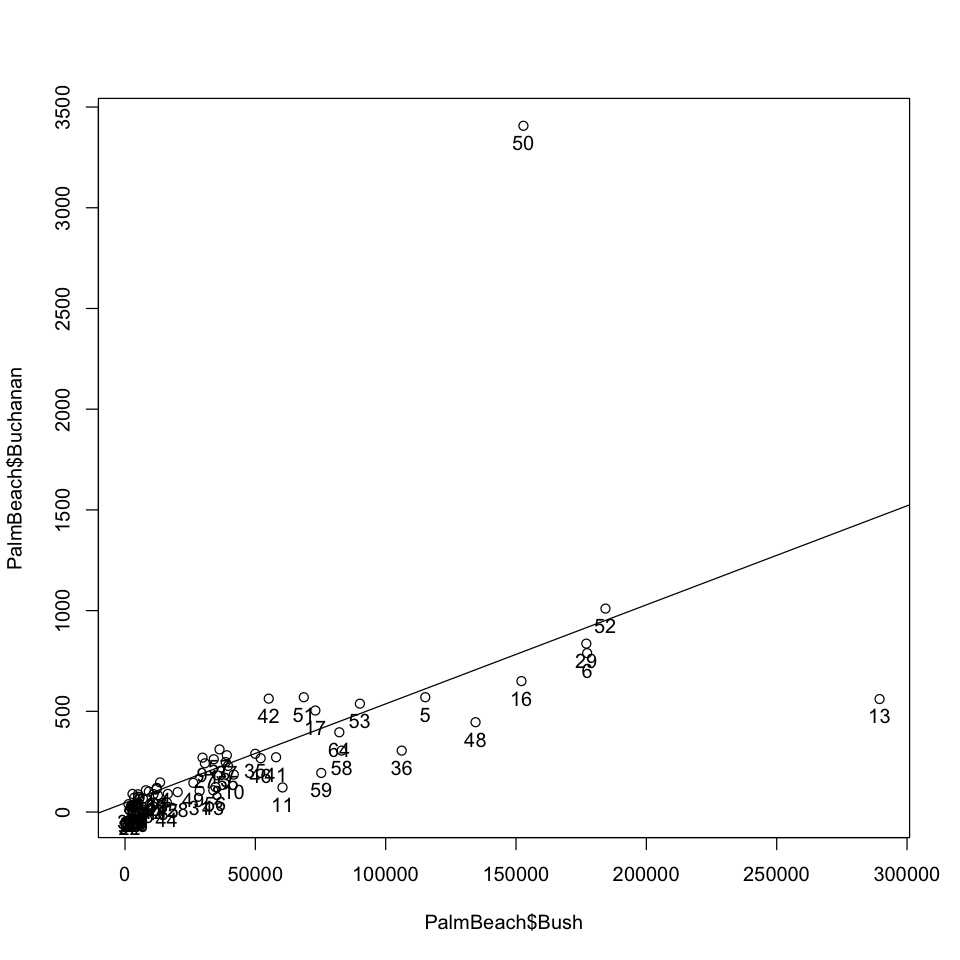

In [3]:
# Solution
fit <- lm(Buchanan ~ Bush, data = PalmBeach)

plot(PalmBeach$Bush, PalmBeach$Buchanan)
abline(fit)
text(PalmBeach$Bush, PalmBeach$Buchanan, pos=1)

(c) We see from part (b) that the 13th and 50th observations in `PalmBeach` are "unusual". 

We can inspect these observations like this:

In [4]:
# Solution
PalmBeach[c(13,50),]

,County,Buchanan,Bush
,<fct>,<int>,<int>
13,DADE,561,289456
50,PALM BEACH,3407,152846


## Three ways to quantify how unusual a point is

1. __Standardized residual__
    - (Rough) formula: $\dfrac{y_i - \hat{y}_i}{\hat{\sigma}_{\varepsilon}}$
    - This expresses the residuals on a common, unitless scale
    - Points with large standardized residuals are called __outliers__

2. __Leverage__
    - Notation: $h_i$
        - See STAT2 Chapter 4 for more detail
    - A point with high leverage _can_ have a strong effect on the fitted line, especially the slope
    - In simple linear regression, this means that the point's $x$ value is far from $\bar{x}$
    - Points with high leverage are called __leverage points__

3. __Cook's distance__
    - Notation: $D_i$
        - See STAT2 Chapter 4 for more detail
    - __We are most concerned with a point that has high leverage and is an outlier__
    - $D_i$ combines the standardized residual and leverage of a point to give an overall summary of its effect on the regression line
    - Points with large Cook's distance are called __influential points__

### Rules of thumb for identifying unusual points in simple linear regression

| Statistic | Moderately unusual | Very unusual |
| :- | :- | :- |
| Standardized residual | beyond $\pm 2$ | beyond $\pm 3$ |
| Leverage $h_i$ | $h_i > \dfrac{4}{n}$ | $h_i > \dfrac{6}{n}$ |
| Cook's distance $D_i$ | $D_i > 0.5$ | $D_i > 1$| 

## Example 2

Use the following code to produce a diagnostic plot that displays standardized residuals, leverage, and Cook's distance for each observation. Use the output to comment on our two unusual points.

[1] 67

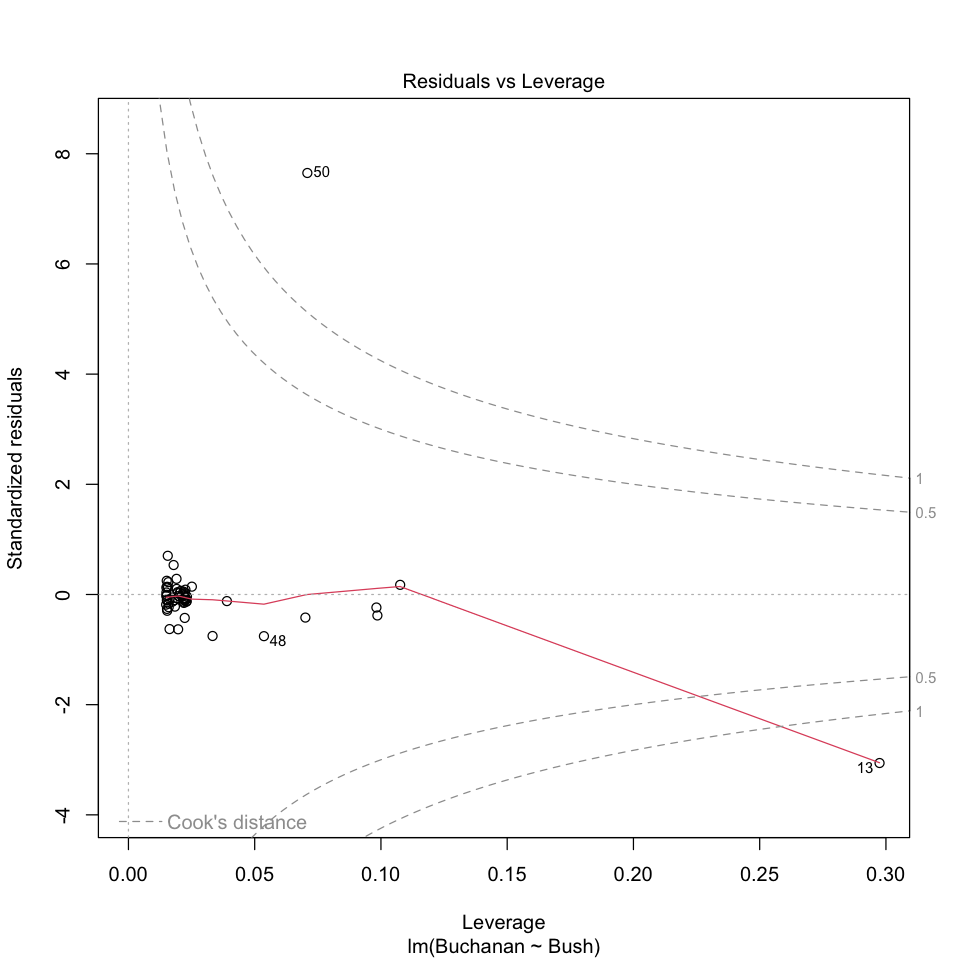

In [5]:
nrow(PalmBeach)     # n = number of observations in dataset
plot(fit, which=5)  # diagnostic plot

*Write your answer here. Double-click to edit.*

- __Palm Beach (50)__

- __Dade (13)__

*Solution.*

$n = 67$, so $4/n \approx 0.06$ and $6 /n \approx 0.09$.

- __Palm Beach (50)__
    - Standardized residual $\approx 8$ $\Rightarrow$ extreme outlier
    - Leverage $\approx 0.08$ $\Rightarrow$ moderate leverage
    - Cook's distance $> 1$ $\Rightarrow$ very influential point

- __Dade (13)__
    - Standardized residual $\approx -3$ $\Rightarrow$ moderate to extreme outlier
    - Leverage $\approx 0.30$ $\Rightarrow$ high leverage
    - Cook's distance $> 1$ $\Rightarrow$ very influential point

_Note._ We can also look at the following diagnostic plot for a direct comparison of Cook's distance:

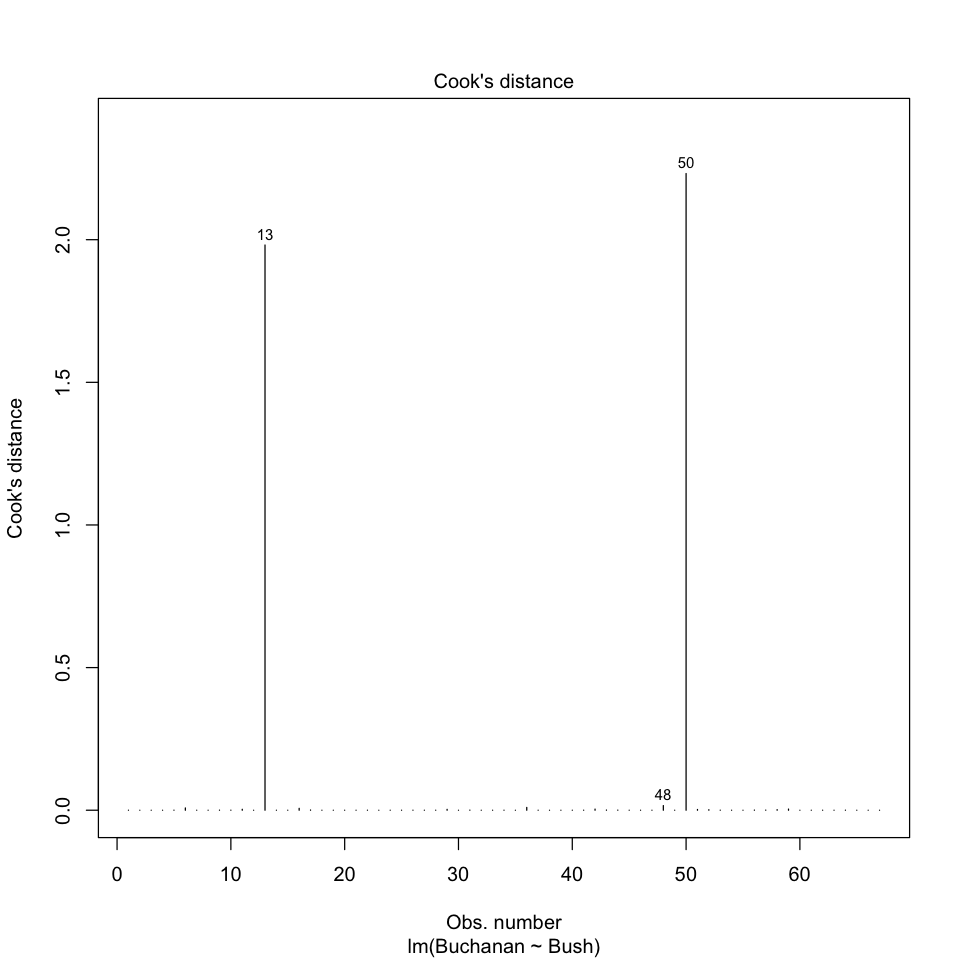

In [6]:
plot(fit, which=4)

## Some options for dealing with a "troubling" observation

- Make sure there wasn't an __error__ with recording data

- Investigate whether a __different model__ would be a better fit
    - For example: other predictors, other forms/transformations of predictors, distribution assumptions

    
- Fit the model with and without the point in question and __report both results__    

❗️ It is __NOT OKAY__ to just remove a data point and never mention it!

## Example 3

We saw that Palm Beach County (50) has the highest Cook's distance.

In R, we can remove an observation (or multiple observations) from a data frame like this:

In [7]:
PalmBeach2 <- PalmBeach[-c(50),]

(a) Remove Palm Beach County and re-fit the model without it.

In [8]:
# Solution
fit2 <- lm(Buchanan ~ Bush, data = PalmBeach2)

(b) Make a scatterplot of `Bush` vs `Buchanan` using all the data. 
Overlay the original fitted line and the new fitted line without Palm Beach.

_Tip._ `abline(fit2, col="blue")` draws the fitted line in blue.

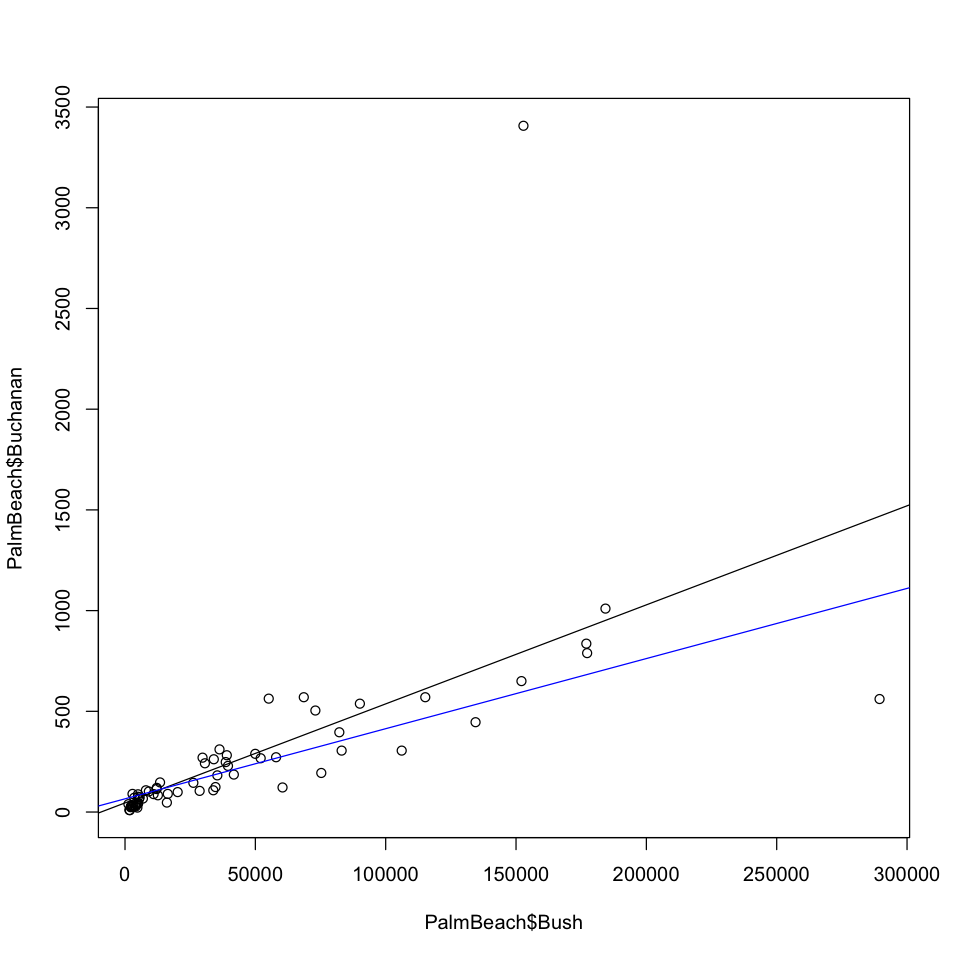

In [9]:
# Solution
plot(PalmBeach$Bush, PalmBeach$Buchanan)
abline(fit)
abline(fit2, col="blue")

(c) Compare the fitted model equations with and without Palm Beach County.

In [10]:
# Solution
summary(fit)
summary(fit2)


Call:
lm(formula = Buchanan ~ Bush, data = PalmBeach)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.50  -46.10  -29.19   12.26 2610.19 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.529e+01  5.448e+01   0.831    0.409    
Bush        4.917e-03  7.644e-04   6.432 1.73e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 353.9 on 65 degrees of freedom
Multiple R-squared:  0.3889,	Adjusted R-squared:  0.3795 
F-statistic: 41.37 on 1 and 65 DF,  p-value: 1.727e-08



Call:
lm(formula = Buchanan ~ Bush, data = PalmBeach2)

Residuals:
    Min      1Q  Median      3Q     Max 
-512.43  -47.97  -17.09   41.78  305.45 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.557e+01  1.733e+01   3.784 0.000343 ***
Bush        3.482e-03  2.501e-04  13.923  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 112.5 on 64 degrees of freedom
Multiple R-squared:  0.7518,	Adjusted R-squared:  0.7479 
F-statistic: 193.8 on 1 and 64 DF,  p-value: < 2.2e-16


*Write your answer here. Double-click to edit.*

- The fitted model with Palm Beach:

- The fitted model without Palm Beach:

*Solution.*

- The fitted model with Palm Beach:

$$\widehat{\mathit{Buchanan}} = 45.3 + 0.00049 \mathit{Bush}$$

- The fitted model without Palm Beach:

$$\widehat{\mathit{Buchanan}} = 65.6 + 0.00035 \mathit{Bush}$$